# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project we’ll be analyzing a data set containing information about 10,000 movies collected from The Movie Database (TMDb). We will try to answer next questions:
#### Which genres are most popular from year to year?
#### What kind of properties are associated with high profitable movies?

<a id='wrangling'></a>
## Data Wrangling
### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import seaborn as sns
from IPython.display import HTML

### Loading data

Let's load data from a CSV file and print out a few lines.

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   

                        homepage         director             tagline  ...  \
0  http://www.jurassicworld.com/  Colin Trevorrow   The park is open.  ...   
1    http://www.madmaxmovie.com/    George Miller  What a Lovely Day.  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  

[2 rows x 21 columns]

In [3]:
df.shape

(10866, 21)

We'll be analyzing a dataframe with 21 columns and 10866 entries. We can notice that columns “cast”, “genres” and “production_companies” contain multiple values separated by '|' character.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

There are several columns with missing values. For example "homepage" has only 2936 values, "tagline" has 8042 values. Luckily all these columns do not make any sense for further analyzing and can be dropped. So, the first thing we're going to do is to drop all unnecessary columns.

### Cleaning data

#### Drop unneccessary columns

In [5]:
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview'],
        axis=1,
        inplace=True)
df.shape

(10866, 15)

Now we have only 15 columns left.

#### Change data type of "release_date"
We can notice that "release_date" Dtype is object. It means date is in string format. It's better to convert it to special datetime format.

In [6]:
df.release_date = pd.to_datetime(df['release_date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10866 non-null  float64       
 1   budget                10866 non-null  int64         
 2   revenue               10866 non-null  int64         
 3   original_title        10866 non-null  object        
 4   cast                  10790 non-null  object        
 5   director              10822 non-null  object        
 6   runtime               10866 non-null  int64         
 7   genres                10843 non-null  object        
 8   production_companies  9836 non-null   object        
 9   release_date          10866 non-null  datetime64[ns]
 10  vote_count            10866 non-null  int64         
 11  vote_average          10866 non-null  float64       
 12  release_year          10866 non-null  int64         
 13  budget_adj      

#### Generate descriptive statistics

In [8]:
df.describe()

popularity        budget       revenue       runtime    vote_count  \
count  10866.000000  1.086600e+04  1.086600e+04  10866.000000  10866.000000   
mean       0.646441  1.462570e+07  3.982332e+07    102.070863    217.389748   
std        1.000185  3.091321e+07  1.170035e+08     31.381405    575.619058   
min        0.000065  0.000000e+00  0.000000e+00      0.000000     10.000000   
25%        0.207583  0.000000e+00  0.000000e+00     90.000000     17.000000   
50%        0.383856  0.000000e+00  0.000000e+00     99.000000     38.000000   
75%        0.713817  1.500000e+07  2.400000e+07    111.000000    145.750000   
max       32.985763  4.250000e+08  2.781506e+09    900.000000   9767.000000   

       vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean       5.974922   2001.322658  1.755104e+07  5.136436e+07  
std        0.935142     12.812941  3.430616e+07  1.446325e+08  
min        1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%        5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%        6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%        6.600000   2011.000000  2.085325e+07  3.369710e+07  
max        9.200000   2015.000000  4.250000e+08  2.827124e+09

"budget", "budget_adj", "revenue", "revenue_adj", "runtime" columns have zero values. Obviously, these values can't be zero and I think they are supposed to be missing. We have to change them to NaN so that they’ll not influence statistics.

#### Replace 0 values to NaN

In [9]:
df['budget']=df['budget'].replace(0, np.nan)
df['budget_adj']=df['budget_adj'].replace(0, np.nan)
df['revenue']=df['revenue'].replace(0, np.nan)
df['revenue_adj']=df['revenue_adj'].replace(0, np.nan)
df['runtime']=df['runtime'].replace(0, np.nan)

In [10]:
df.describe()

popularity        budget       revenue       runtime    vote_count  \
count  10866.000000  5.170000e+03  4.850000e+03  10835.000000  10866.000000   
mean       0.646441  3.073943e+07  8.922066e+07    102.362898    217.389748   
std        1.000185  3.890065e+07  1.620684e+08     30.946957    575.619058   
min        0.000065  1.000000e+00  2.000000e+00      2.000000     10.000000   
25%        0.207583  6.000000e+06  7.708081e+06     90.000000     17.000000   
50%        0.383856  1.700000e+07  3.182654e+07     99.000000     38.000000   
75%        0.713817  4.000000e+07  9.991823e+07    112.000000    145.750000   
max       32.985763  4.250000e+08  2.781506e+09    900.000000   9767.000000   

       vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  5.170000e+03  4.850000e+03  
mean       5.974922   2001.322658  3.688774e+07  1.150774e+08  
std        0.935142     12.812941  4.195701e+07  1.988419e+08  
min        1.500000   1960.000000  9.210911e-01  2.370705e+00  
25%        5.400000   1995.000000  8.102293e+06  1.046262e+07  
50%        6.000000   2006.000000  2.272271e+07  4.392749e+07  
75%        6.600000   2011.000000  5.007483e+07  1.315644e+08  
max        9.200000   2015.000000  4.250000e+08  2.827124e+09

#### Show distibution of data

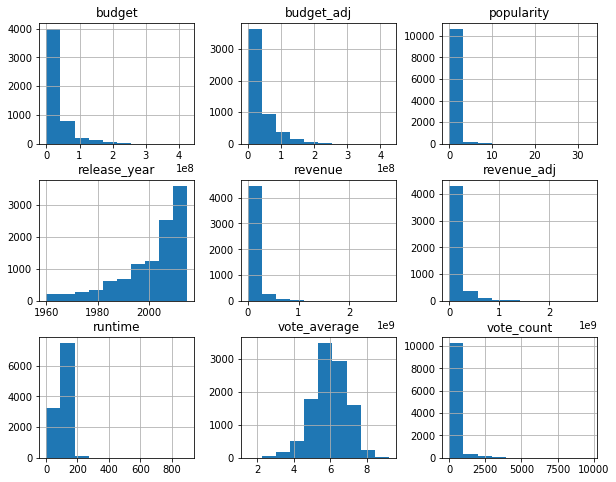

In [11]:
df.hist(figsize=(10,8));

We can notice that “budget”, “revenue”, "popularity", "vote_count" histograms are extremely right skewed. Max values of these columns stand out of all other numbers. For example, "popularity" mean value is around 0.64, standard deviation is around 1.0, 75% values are lower than 1.0, but the max value is almost 33!

"release_year" histogram is left skewed. It means the number of movie releases increases every year.

"vote_average" is almost normally distributed as it should be.

#### Final data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10866 non-null  float64       
 1   budget                5170 non-null   float64       
 2   revenue               4850 non-null   float64       
 3   original_title        10866 non-null  object        
 4   cast                  10790 non-null  object        
 5   director              10822 non-null  object        
 6   runtime               10835 non-null  float64       
 7   genres                10843 non-null  object        
 8   production_companies  9836 non-null   object        
 9   release_date          10866 non-null  datetime64[ns]
 10  vote_count            10866 non-null  int64         
 11  vote_average          10866 non-null  float64       
 12  release_year          10866 non-null  int64         
 13  budget_adj      

There are still several columns with null values. But it makes no sense to drop these entries. Better tactic would be to use as much data as possible for every question.

<a id='eda'></a>
## Exploratory Data Analysis

Now that we've trimmed and cleaned our data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.
### Research Question 1: Which genres are most popular from year to year?

To answer this question we'll create an animated horizontal bar chart.

#### References
Animated bar chart
https://towardsdatascience.com/bar-chart-race-in-python-with-matplotlib-8e687a5c8a41

Splitting values
https://medium.com/@lsriniv/splitting-columns-of-series-dataframe-into-rows-step-by-step-explanation-9fce88ed1144

Previously we mentioned that “genres” column contains multiple values separated by '|' character. So we have to split them in order to form the list of all genres.

In [13]:
genres = df.genres.str.split('|', expand=True).stack().value_counts().index
print("Number of genres is {}".format(genres.size))

Number of genres is 20


We have 20 genres overall. Let's create a color map for them, so that every genre would have a unique color. Choosing colors is a very complicated task, so we’ll use built-in matplotlib “tab20” colormap that has exactly 20 colors with a good-looking palette.

In [14]:
colors_map = {}
cm = plt.cm.get_cmap('tab20')
#we have 20 colors in [0-1] range
#so start from 0.025 and add 0.05 every cycle
#this way we get different colors for
#every genres
off = 0.025
for genre in genres:
    colors_map[genre] = cm(off)
    off += 0.05

Let's create a function that returns a sorted dataframe with dependency of values from a multiple value column and a single value column. It will help us to analyse all multiple values columns.

In [15]:
def get_mdepend(df, multival_col, qual_col):
    #split column by '|' character and stack
    split_stack = df[multival_col].str.split('|', expand=True).stack()
    #convert series to frame
    split_frame = split_stack.to_frame(name=multival_col)
    #drop unneeded index
    split_frame.index = split_frame.index.droplevel(1)
    #add qual_col, group and find average
    dep = split_frame.join(df[qual_col]).groupby(multival_col).mean()
    #return sorted dependency
    return dep.sort_values(qual_col)   

Next we'll create a function that plots our horizontal bar chart with the popularity of movies for all genres up to desired year.

In [16]:
def draw_barchart_frame(current_year):
    #get data only up to current_year
    dep = get_mdepend(df.query('release_year <= {}'.format(current_year)),
                         'genres', 'popularity')
    #clear before draw
    ax.clear()
    #plot horizontal barchart using our colormap
    ax.barh(dep.index,
            dep['popularity'].tolist(),
            color=[colors_map[x] for x in dep.index])
    #plot genres and values
    dx = dep.max() / 200
    for i, (value,
            name) in enumerate(zip(dep['popularity'].tolist(), dep.index)):
        #genre name
        ax.text(value - dx,
                i,
                name,
                size=14,
                weight=600,
                ha='right',
                va='center')
        #genre value
        ax.text(value + dx,
                i,
                f'{value:,.2f}',
                size=14,
                ha='left',
                va='center')

    #big current year
    ax.text(1,
            0.2,
            current_year,
            transform=ax.transAxes,
            color='#777777',
            size=46,
            ha='right',
            weight=800)
    #plot caption of ticks
    ax.text(0,
            1.065,
            'Popularity',
            transform=ax.transAxes,
            size=14,
            color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    #chart caption
    ax.text(0,
            1.16,
            'Popularity of movie genres from 1960 to 2015',
            transform=ax.transAxes,
            size=24,
            weight=600,
            ha='left',
            va='top')

Finally we'll create an animation.

In [17]:
#create figure
fig, ax = plt.subplots(figsize=(10, 8))
#remove borders
plt.box(False)
#immediately close it to not provide additional figure 
#after animation block
plt.close()
animator = animation.FuncAnimation(fig,
                                   draw_barchart_frame,
                                   frames=range(1960, 2016),
                                   interval=666)
#add space before animation
print('')
HTML(animator.to_jshtml())

### Research Question 2: What kind of properties are associated with high profit movies?

#### Preparing data

We have to get data only with budget and revenue values available. Also I think it's better to use adjusted values so that money inflation doesn't interfere our calculations.

In [18]:
dfp = df[df.budget_adj.notnull() & df.revenue_adj.notnull()].copy()
dfp['profit'] = dfp.revenue_adj - dfp.budget_adj

#### Correlation

Let's try to find if there is any correlation with profit.

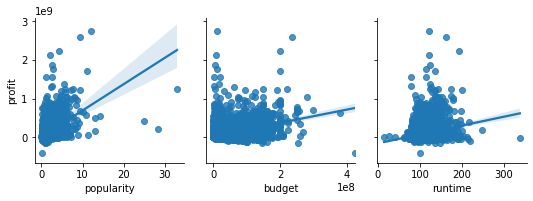

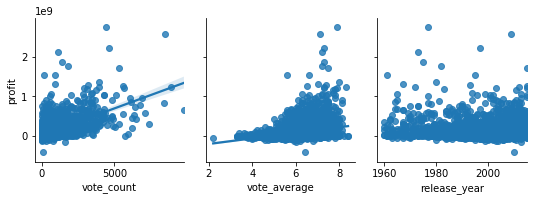

In [19]:
sns.pairplot(data=dfp,
             x_vars=['popularity', 'budget', 'runtime'],
             y_vars=['profit'],
             kind='reg');
sns.pairplot(data=dfp,
             x_vars=['vote_count', 'vote_average', 'release_year'],
             y_vars=['profit'],
             kind='reg');

"popularity" and "vote_count" have a positive correlation over profit. Obviously, the more people watch the movie the more revenue it gets.

"budget" has a small positive correlation. So we can conclude that higher investments in movies cause higher revenues.

Surprisingly, "vote_average" has a weak positive correlation with profit.


#### Setup default plot

Let's configure default parameters for our plots like figure size and font sizes.

In [20]:
params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (10, 8),
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'xx-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
plt.rcParams.update(params)

Next we will implement a function to plot a profit chart.

In [21]:
def profit_chart(df, title):
    #create figure
    ax = df.plot(kind='barh')
    #remove legend from plot
    ax.get_legend().remove()
    #set custom axis formatter for millions
    ax.xaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, p: format(int(x / 1e6), ',')))
    #set titles and labels
    plt.title(title)
    plt.xlabel('Average Profit ($ million)')
    plt.ylabel(None)

#### Genre

Let's find out how profit depends from genre.

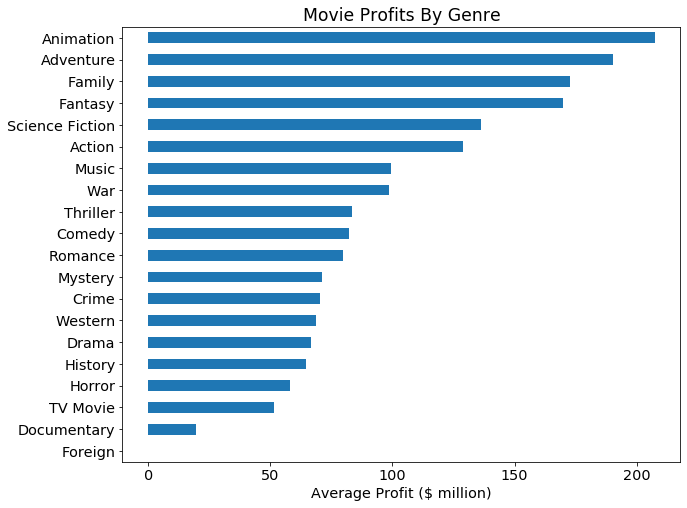

In [22]:
profit_chart(get_mdepend(dfp, 'genres', 'profit'), 'Movie Profits By Genre')

#### Production company

There are lots of production companies. Let's find out TOP-10 profitable production companies.

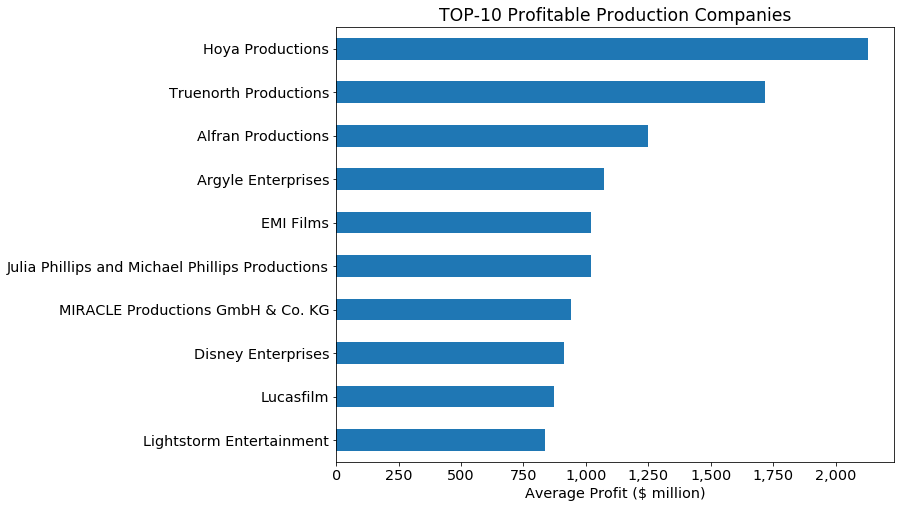

In [23]:
profit_chart(
    #last 10 values
    get_mdepend(dfp, 'production_companies', 'profit').tail(10),
    'TOP-10 Profitable Production Companies')

#### Cast

Let's find out TOP-10 profitable actors.

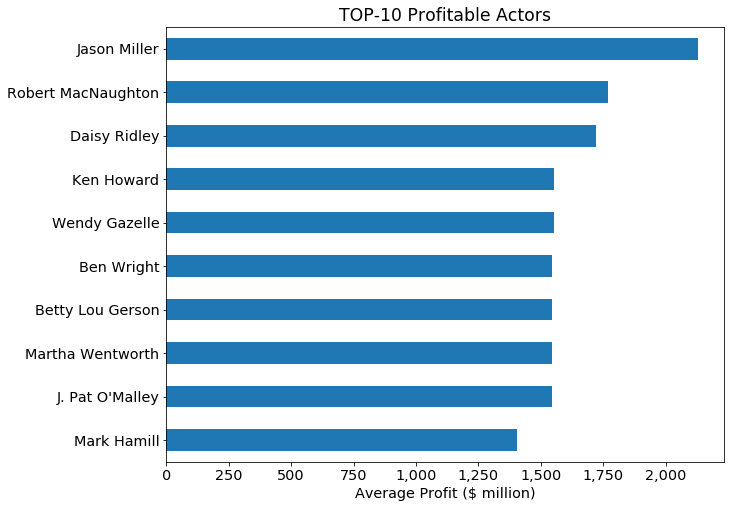

In [24]:
profit_chart(
    get_mdepend(dfp, 'cast', 'profit').tail(10), 'TOP-10 Profitable Actors')

#### Release year
Let's look how profit depends from release year.

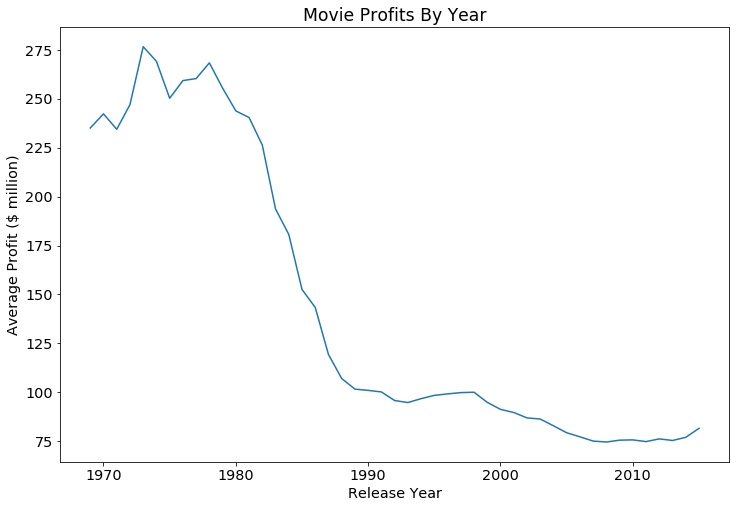

In [25]:
year_profit_mean = dfp.groupby('release_year')['profit'].mean()
#rolling average over 10-years
year_profit_rol = year_profit_mean.rolling(window=10).mean()

ax = year_profit_rol.plot(figsize=(12, 8))
#set custom axis formatter
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y, p: format(int(y / 1e6), ',')))
#set titles and labels
plt.title('Movie Profits By Year')
plt.ylabel('Average Profit ($ million)')
plt.xlabel("Release Year");

We can see how huge the difference between profits in 1980s and nowadays. It is probably connected with the fact that number of movies every year was increasing accordingly. Let's quickly look at graph to prove our findings.

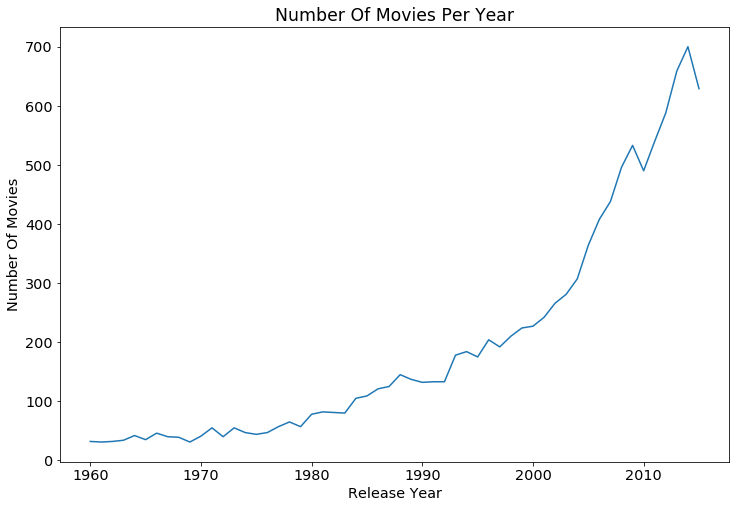

In [26]:
#we know that popularity column has no nulls
#so use it for counting the number of movies
ax = df.groupby('release_year')['popularity'].count().plot(figsize=(12, 8))
#set titles and labels
plt.title('Number Of Movies Per Year')
plt.ylabel('Number Of Movies')
plt.xlabel("Release Year");

We can notice that the number of movies over year moving in the opposite direction with movie profits over year.

<a id='conclusions'></a>
## Conclusions
Finally, we can summarize our findings and answer questions from the Introduction section.

By looking at animated bar charts of genres' popularity we can watch how movie trends were changing over the years.
1. "Animation" and "Adventure" are the most popular genres and they were competing with each other for the whole period of time.
2. The least popular genres are "Documentary" and "Foreign".
3. "TV Movie" was popular before 1970 but then rapidly became extremely unpopular.
4. "Science Fiction" was extremely unpopular before 1970 but then rapidly became one of the most popular genres.
5. "Fantasy" was gradually increasing in popularity and became very popular recently.

Properties of high profit movies:
1. High budget.
2. High popularity.
3. Genre is one of these: "Animation", "Adventure", "Family", "Fantasy" and "Science Fiction".
4. Production companies are one of these: "Hoya Productions", "Truenorth Productions", "Alfran Productions".
5. The cast of the movie includes these actors: "Jason Miller", "Robert MacNaughton", "Daisy Ridley".
6. Release year is under 1980s.

Limitations:
There is a lot of missing data in the dataset.